In [128]:
using Pkg
using Pkg
Pkg.add(["Images", "ImageIO", "FileIO", "Plots"])


   Resolving package versions...


   Installed fzf_jll ─ v0.35.1+0
   Installed JLFzf ─── v0.1.6
   Installed Scratch ─ v1.2.1
   Installed Unitful ─ v1.18.0


    Updating `~/Documents/coding/JuliaEO2024/Project.toml`
  [82e4d734] + ImageIO v0.6.7
  [91a5bcdd] + Plots v1.39.0
    Updating `~/Documents/coding/JuliaEO2024/Manifest.toml`


  [187b0558] + ConstructionBase v1.5.4
  [d38c429a] + Contour v0.6.2
  [c87230d0] + FFMPEG v0.4.1
  [59287772] + Formatting v0.4.2
⌃ [28b8d3ca] + GR v0.72.8
  [42e2da0e] + Grisu v1.0.2
  [1019f520] + JLFzf v0.1.6
  [23fbe1c1] + Latexify v0.16.1
  [442fdcdd] + Measures v0.3.2
  [b98c9c47] + Pipe v1.3.0
  [ccf2f8ad] + PlotThemes v3.1.0
  [995b91a9] + PlotUtils v1.3.5
  [91a5bcdd] + Plots v1.39.0
  [01d81517] + RecipesPipeline v0.6.12
  [05181044] + RelocatableFolders v1.0.1
  [6c6a2e73] + Scratch v1.2.1
  [992d4aef] + Showoff v1.0.3
  [1cfade01] + UnicodeFun v0.4.1
  [1986cc42] + Unitful v1.18.0
  [45397f5d] + UnitfulLatexify v1.6.3
  [41fe7b60] + Unzip v0.2.0
  [6e34b625] + Bzip2_jll v1.0.8+0
  [83423d85] + Cairo_jll v1.16.1+1
  [2702e6a9] + EpollShim_jll v0.0.20230411+0
  [2e619515] + Expat_jll v2.5.0+0
⌃ [b22a6f82] + FFMPEG_jll v4.4.2+2
  [a3f928ae] + Fontconfig_jll v2.13.93+0
  [d7e528f0] + FreeType2_jll v2.13.1+0
  [559328eb] + FriBidi_jll v1.0.10+0
  [0656b61e] + GLFW_jll v3.3.8+0


Precompiling 

project...


  ✓ Scratch
  ✓ fzf_jll


  ✓ RelocatableFolders


  ✓ JLFzf


  ✓ Unitful


  ✓ UnitfulLatexify


  ✓ Plots
  7 dependencies successfully precompiled in 52 seconds. 253 already precompiled.


In [ ]:
using Pkg
Pkg.add(["TiffImages", "Makie"])


In [130]:
using Images, FileIO, Plots

# Define a structure to hold Sentinel-1 data
struct Sentinel1Band
    data::Matrix{Float32}  # Image data
    metadata::Dict        # Metadata
end

struct Sentinel1Image
    VV::Sentinel1Band
    VH::Sentinel1Band
end

# Function to load a single band
function load_band(file_path::String)
    # Load the image data
    image_data = load(file_path)

    # You can add more sophisticated metadata handling here
    metadata = Dict("path" => file_path)

    return Sentinel1Band(image_data, metadata)
end

# Function to load a Sentinel-1 image with VV and VH bands
function load_sentinel1_image(vv_path::String, vh_path::String)
    vv_band = load_band(vv_path)
    vh_band = load_band(vh_path)
    return Sentinel1Image(vv_band, vh_band)
end

# Function to display a Sentinel-1 band
function display_band(band::Sentinel1Band)
    plot(Gray.(band.data), axis=false)
end

# Example usage
# sentinel1_img = load_sentinel1_image("path/to/vv_band.tif", "path/to/vh_band.tif")
# display_band(sentinel1_img.VV)
# display_band(sentinel1_img.VH)


display_band (generic function with 1 method)

In [129]:
vh = "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vh-20220612t173329-20220612t173354-043633-05359a-002.tiff"
vv = "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff"

"/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff"

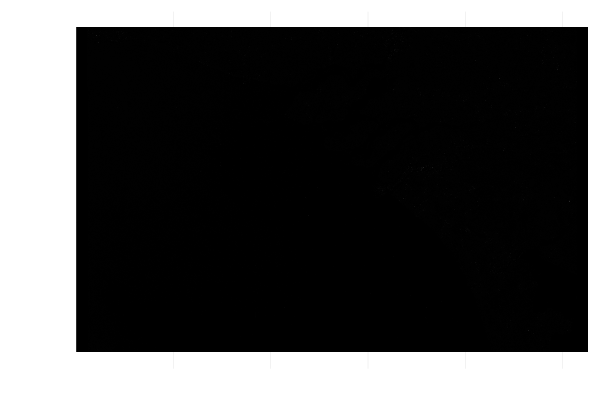

In [132]:
sentinel1_img = load_sentinel1_image(vv, vh)

In [ ]:
sentinel1_img

In [134]:
using TiffImages
using Makie

# Define a structure to hold Sentinel-1 data
struct Sentinel1Band
    data::Array{<:Any, 2}  # Image data
    metadata::Dict        # Metadata
end

struct Sentinel1Image
    VV::Sentinel1Band
    VH::Sentinel1Band
end

# Function to load a single band
function load_band(file_path::String)
    # Load the TIFF image
    tiff_img = TiffImages.read(file_path)

    # Extract image data
    image_data = TiffImages.asarray(tiff_img)

    # Extract metadata (placeholder for now)
    metadata = Dict("path" => file_path)

    return Sentinel1Band(image_data, metadata)
end

# Function to load a Sentinel-1 image with VV and VH bands
function load_sentinel1_image(vv_path::String, vh_path::String)
    vv_band = load_band(vv_path)
    vh_band = load_band(vh_path)
    return Sentinel1Image(vv_band, vh_band)
end

# Function to display a Sentinel-1 band
function display_band(band::Sentinel1Band)
    Makie.imshow(band.data)
end

# Example usage
# sentinel1_img = load_sentinel1_image("path/to/vv_band.tif", "path/to/vh_band.tif")
# display_band(sentinel1_img.VV)
# display_band(sentinel1_img.VH)


ErrorException: invalid redefinition of type Sentinel1Band

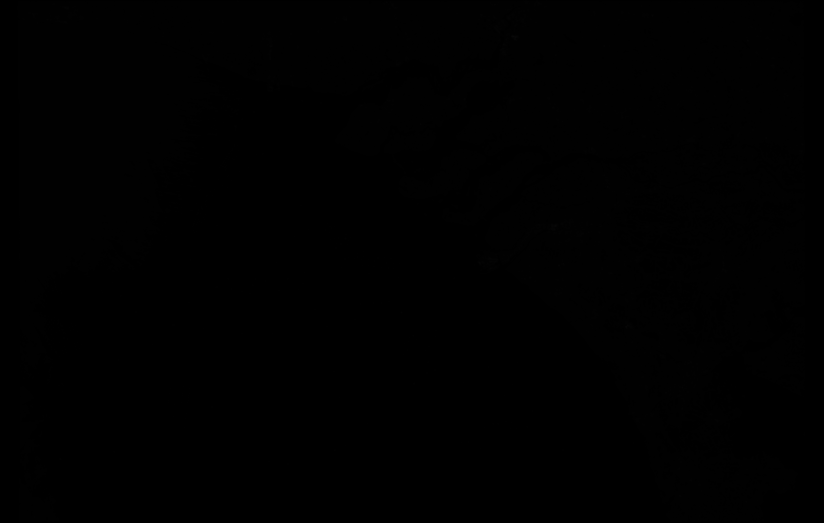

┌ Warning: Module ImageCore with build ID 425567388550584 is missing from the cache.
│ This may mean ImageCore [a09fc81d-aa75-5fe9-8630-4744c3626534] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1325


In [145]:
img = TiffImages.load(vv)

In [146]:
typeof(img)

TiffImages.DenseTaggedImage{Gray{N0f16}, 2, UInt32, Matrix{Gray{N0f16}}}

In [149]:
img[160:180, 50]

In [137]:
tiff_img = TiffImages.read(vv)
image_data = TiffImages.asarray(tiff_img)

UndefVarError: UndefVarError: asarray not defined

In [135]:
sentinel1_img = load_sentinel1_image(vv, vh)

Sentinel1Image(Sentinel1Band(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Dict("path" => "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vv-20220612t173329-20220612t173354-043633-05359a-001.tiff")), Sentinel1Band(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Dict("path" => "/Users/kaaso/Documents/coding/JuliaEO2024/data/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE/measurement/s1a-iw-grd-vh-20220612t173329-20220612t173354-043633-05359a-002.tiff")))

In [144]:
sentinel1_img.VV.data[1000:20000,1999:3999]

BoundsError: BoundsError: attempt to access 16683×26316 Matrix{Float32} at index [1000:20000, 1999:3999]

In [42]:
include("metadata.jl")

vector_of_dicts_to_dataframe (generic function with 1 method)

In [43]:
data = download_sentinel_metadata(product_type= "GRD",verbose=0);
df = vector_of_dicts_to_dataframe(data["features"]);


In [39]:
using HTTP

"""
`download_image`

Download an image from a specified URL.

# Arguments
- `url::String`: URL of the image to download.
- `dest_path::String`: Destination path where the image will be saved.
- `auth::Dict{String,String}`: Dictionary containing authentication details, if necessary.

# Usage
download_image("https://example.com/image.png", "local_image.png", Dict("Authorization" => "Bearer your_token_here"))
"""
function download_image(url::String, dest_path::String; auth::Dict{String,String}=Dict())
    headers = HTTP.Headers(auth)  # Create headers with the auth details if provided
    response = HTTP.get(url, headers=headers)  # Make the GET request with authentication headers

    if response.status == 200
        # If the request is successful, write the content to a file
        open(dest_path, "w") do file
            write(file, response.body)
        end
        println("Image downloaded successfully to $dest_path")
    else
        # If the request failed, print the status code and response body
        println("Request failed with status code: ", response.status)
        println("Response body: ", String(response.body))
    end
end


download_image

In [4]:
start_date = "2022-06-01"
end_date = "2022-06-10"
data_collection = "SENTINEL-2"
aoi = "POLYGON((4.220581 50.958859,4.521264 50.953236,4.545977 50.906064,4.541858 50.802029,4.489685 50.763825,4.23843 50.767734,4.192435 50.806369,4.189689 50.907363,4.220581 50.958859))'"

"POLYGON((4.220581 50.958859,4.521264 50.953236,4.545977 50.906064,4.541858 50.802029,4.489685 50.763825,4.23843 50.767734,4.192435 50.806369,4.189689 50.907363,4.220581 50.958859))'"

In [ ]:
#import Pkg; Pkg.add("HTTP"), Pkg.add("JSON"), Pkg.add("DataFrames")

In [15]:
using HTTP
using JSON
using DataFrames

In [27]:
using HTTP
using JSON
using DataFrames

start_date = "2022-06-01"
end_date = "2022-06-10"
data_collection = "SENTINEL-2"
aoi = "POLYGON((4.220581 50.958859,4.521264 50.953236,4.545977 50.906064,4.541858 50.802029,4.489685 50.763825,4.23843 50.767734,4.192435 50.806369,4.189689 50.907363,4.220581 50.958859))"

url = "https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name eq '$data_collection' and OData.CSC.Intersects(area=geography'SRID=4326;$aoi) and ContentDate/Start gt $start_date""T00:00:00.000Z and ContentDate/Start lt $end_date""T00:00:00.000Z"
response = HTTP.get(url)

if response.status == 200
    json_data = JSON.parse(String(response.body))
    df = DataFrame(json_data["value"])
    first(df, 5)  # Display the first 5 rows of the DataFrame
else
    println("Error: HTTP request failed with status code ", response.status)
end


ErrorException: syntax: cannot juxtapose string literal

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff
Cache-Control: no-cache
Connection: close
Content-Type: text/html; charset=utf-8
Pragma: no-cache
Content-Length: 247

<html><head><title>Request Rejected</title></head><body>The requested URL was rejected. Please consult with your administrator.<br><br>Your support ID is: 12792259169064407051<br><br><a href='javascript:history.back();'>[Go Back]</a></body></html>"""

In [18]:
import Pkg; Pkg.add("Tables")

   Resolving package versions...


    Updating `~/Documents/coding/JuliaEO2024/Project.toml`
  [bd369af6] + Tables v1.11.1
  No Changes to `~/Documents/coding/JuliaEO2024/Manifest.toml`


In [31]:
using HTTP
using JSON
using DataFrames
using Tables

# Variables
start_date = "2022-06-01"
end_date = "2022-06-10"
data_collection = "SENTINEL-2"
aoi = "POLYGON((4.220581 50.958859,4.521264 50.953236,4.545977 50.906064,4.541858 50.802029,4.489685 50.763825,4.23843 50.767734,4.192435 50.806369,4.189689 50.907363,4.220581 50.958859))"

# Construct URL
url = "https://catalogue.dataspace.copernicus.eu/odata/v1/Products?\$filter=Collection/Name eq '$data_collection' and OData.CSC.Intersects(area=geography'SRID=4326;$aoi) and ContentDate/Start gt $start_date and ContentDate/Start lt $end_date"
headers = Dict("User-Agent" => "Mozilla/5.0 (compatible; Julia HTTP.jl)")


# Make the GET request
#response = HTTP.get(url)
response = HTTP.get(url, headers=headers)

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff
Cache-Control: no-cache
Connection: close
Content-Type: text/html; charset=utf-8
Pragma: no-cache
Content-Length: 247

<html><head><title>Request Rejected</title></head><body>The requested URL was rejected. Please consult with your administrator.<br><br>Your support ID is: 12792259169065642760<br><br><a href='javascript:history.back();'>[Go Back]</a></body></html>"""

In [22]:


# Parse the JSON response
json_response = JSON.parse(String(response.body))

# Convert to DataFrame
df = DataFrame(Tables.table(json_response["value"]))

# Display the first 5 rows
first(df, 5)


ErrorException: Unexpected character
Line: 0
Around: ...<html><head><title>Req...
            ^


In [32]:
json = "https://catalogue.dataspace.copernicus.eu/odata/v1/Products?\$filter=Collection/Name eq '$(data_collection)' and OData.CSC.Intersects(area=geography'SRID=4326;$(aoi)) and ContentDate/Start gt $(start_date)T00:00:00.000Z and ContentDate/Start lt $(end_date)T00:00:00.000Z"

"https://catalogue.dataspace.copernicus.eu/odata/v1/Products?\$filter=Collection/Name eq 'SENTINEL-2' and OData.CSC.Intersects(area=geography'SRID=4326;POLYGON((4.220581 50.958859,4.521264 50.953236,4.545977 50.906064,4.541858 50.802029,4.489685 50.763825,4.23843 50.767734,4.192435 50.806369,4.189689 50.907363,4.220581 50.958859))) and ContentDate/Start gt 2022-06-01T00:00:00.000Z and ContentDate/Start lt 2022-06-10T00:00:00.000Z"

In [33]:
using HTTP, JSON, DataFrames, JSON3

In [34]:
response = HTTP.get(json)


HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff
Cache-Control: no-cache
Connection: close
Content-Type: text/html; charset=utf-8
Pragma: no-cache
Content-Length: 247

<html><head><title>Request Rejected</title></head><body>The requested URL was rejected. Please consult with your administrator.<br><br>Your support ID is: 12792259169064446043<br><br><a href='javascript:history.back();'>[Go Back]</a></body></html>"""

In [35]:
String(response.body)

"<html><head><title>Request Rejected</title></head><body>The requested URL was rejected. Please consult with your administrator.<br><br>Your support ID is: 12792259169064446043<br><br><a href='javascript:history.back();'>[Go Back]</a></body></html>"

In [11]:

# Parse the response body to JSON
data = JSON.parse(String(response.body))

ErrorException: Unexpected character
Line: 0
Around: ...<html><head><title>Req...
            ^


In [ ]:

function get_access_token(username::String, password::String) :: String
    data = Dict(
        "client_id" => "cdse-public",
        "username" => username,
        "password" => password,
        "grant_type" => "password"
    )
    url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
    
    try
        response = HTTP.post(url, body=HTTP.escapeuri(data))
        response.status == 200 || throw(Exception("Access token request failed with status code $(response.status)"))
        access_token = JSON3.read(String(response.body))["access_token"]
    catch e
        error("Access token creation failed: ", e)
    end
    return access_token
end


In [46]:
username = "kristian.sorensen@hotmail.com"
password = "lang823LANG823lang823!"
data = Dict(
        "client_id" => "cdse-public",
        "username" => username,
        "password" => password,
        "grant_type" => "password"
    )

url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"

"https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"

In [47]:
# Convert the parameters dictionary to URL query string
query_string = HTTP.escapeuri(data)


"client_id=cdse-public&password=lang823LANG823lang823%21&username=kristian.sorensen%40hotmail.com&grant_type=password"

In [48]:

# Construct the full URL for the request
full_url = string(url, query_string)

"https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/tokenclient_id=cdse-public&password=lang823LANG823lang823%21&username=kristian.sorensen%40hotmail.com&grant_type=password"

In [49]:

# Perform the GET request
response = HTTP.get(full_url)

HTTP.Exceptions.StatusError: HTTP.Exceptions.StatusError(404, "GET", "/auth/realms/CDSE/protocol/openid-connect/tokenclient_id=cdse-public&password=lang823LANG823lang823%21&username=kristian.sorensen%40hotmail.com&grant_type=password", HTTP.Messages.Response:
"""
HTTP/1.1 404 Not Found
referrer-policy: no-referrer
x-frame-options: SAMEORIGIN
strict-transport-security: max-age=31536000; includeSubDomains
x-content-type-options: nosniff
x-xss-protection: 1; mode=block
content-type: application/json
content-length: 270
set-cookie: SERVERID=keycloak002.waw2; path=/
cache-control: private

{"error":"RESTEASY003210: Could not find resource for full path: https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/tokenclient_id=cdse-public&password=lang823LANG823lang823%21&username=kristian.sorensen%40hotmail.com&grant_type=password"}""")

In [52]:
using HTTP
using JSON

function get_access_token(username::String, password::String)::String
    data = Dict(
        "client_id" => "cdse-public",
        "username" => username,
        "password" => password,
        "grant_type" => "password"
    )
    
    try
        response = HTTP.post(
            "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token",
            form = data
        )
        
        if HTTP.statusok(response)
            json_data = JSON.parse(String(response.body))
            return json_data["access_token"]
        else
            println("HTTP request failed with status code: ", response.status)
            println("Response body: ", String(response.body))
            throw(HTTP.Exception(response))
        end
    catch e
        println("Error: ", e)
        throw(e)
    end
end

try
    access_token = get_access_token("kristian.sorensen@hotmail.com", "lang823LANG823lang823!")
    println("Access token: ", access_token)
catch e
    println("Access token retrieval failed: ", e)
end


Error: HTTP

.Exceptions.StatusError(500, "POST", "/auth/realms/CDSE/protocol/openid-connect/token", 

HTTP.Messages.Response:
"""
HTTP/1.1 500 Internal Server Error
referrer-policy: no-referrer
x-frame-options: SAMEORIGIN
strict-transport-security: max-age=31536000; includeSubDomains
x-content-type-options: nosniff
x-xss-protection: 1; mode=block
content-type: application/json
content-length: 25
set-cookie: SERVERID=keycloak001.waw2; path=/

{"error":"unknown_error"}""")
Access token retrieval failed: HTTP.Exceptions.StatusError(500, "POST", "/auth/realms/CDSE/protocol/openid-connect/token", HTTP.Messages.Response:
"""
HTTP/1.1 500 Internal Server Error
referrer-policy: no-referrer
x-frame-options: SAMEORIGIN
strict-transport-security: max-age=31536000; includeSubDomains
x-content-type-options: nosniff
x-xss-protection: 1; mode=block
content-type: application/json
content-length: 25
set-cookie: SERVERID=keycloak001.waw2; path=/

{"error":"unknown_error"}""")


In [53]:
access_token

UndefVarError: UndefVarError: access_token not defined

In [56]:
using HTTP
using JSON

function get_access_token(username::String, password::String)::String
    data = Dict(
        "client_id" => "cdse-public",
        "username" => username,
        "password" => password,
        "grant_type" => "password"
    )
    url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"

    headers = Dict("Content-Type" => "application/x-www-form-urlencoded")

    try
        response = HTTP.post(url, headers, body=HTTP.URIs.escapeuri(HTTP.Form(data)))
        response_body = JSON.parse(String(response.body))
        
        if HTTP.status(response) != 200
            error("Access token creation failed. Response from the server was: $(String(response.body))")
        end

        return response_body["access_token"]
    catch e
        error("Access token creation encountered an error: $e")
    end
end

# Example usage
access_token = get_access_token("kristian.sorensen@hotmail.com", "lang823LANG823lang823!")


ErrorException: Access token creation encountered an error: MethodError(iterate, (HTTP.Forms.Form(IO[IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=467, maxsize=Inf, ptr=1, mark=-1)], 1, -1, "d487823f3e131ee8f0ee4ac57013c272"),), 0x0000000000007ed9)

In [57]:
using HTTP
using JSON

function get_access_token(username::String, password::String)::String
    data = [
        "client_id" => "cdse-public",
        "username" => username,
        "password" => password,
        "grant_type" => "password"
    ]
    url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"

    headers = Dict("Content-Type" => "application/x-www-form-urlencoded")

    try
        response = HTTP.post(url, headers, body=HTTP.Form(data))
        response_body = JSON.parse(String(response.body))
        
        if HTTP.status(response) != 200
            error("Access token creation failed. Response from the server was: $(String(response.body))")
        end

        return response_body["access_token"]
    catch e
        error("Access token creation encountered an error: $e")
    end
end

# Example usage
access_token = get_access_token("your_username", "your_password")


ErrorException: Access token creation encountered an error: HTTP.Exceptions.StatusError(400, "POST", "/auth/realms/CDSE/protocol/openid-connect/token", HTTP.Messages.Response:
"""
HTTP/1.1 400 Bad Request
referrer-policy: no-referrer
x-frame-options: SAMEORIGIN
strict-transport-security: max-age=31536000; includeSubDomains
cache-control: no-store
x-content-type-options: nosniff
pragma: no-cache
x-xss-protection: 1; mode=block
content-type: application/json
content-length: 84
set-cookie: SERVERID=keycloak002.waw2; path=/

{"error":"invalid_request","error_description":"Missing form parameter: grant_type"}""")

In [58]:
using HTTP
using JSON

function get_access_token(username::String, password::String)::String
    data = Dict(
        "client_id" => "cdse-public",
        "username" => username,
        "password" => password,
        "grant_type" => "password"
    )
    
    try
        response = HTTP.post(
            "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token",
            form = data
        )
        
        if HTTP.statusok(response)
            json_data = JSON.parse(String(response.body))
            access_token = get(json_data, "access_token", "")
            return access_token
        else
            println("HTTP request failed with status code: ", response.status)
            println("Response body: ", String(response.body))
            return ""  # Return an empty string to indicate failure
        end
    catch e
        println("Error: ", e)
        return ""  # Return an empty string to indicate failure
    end
end

# Usage
access_token = get_access_token("kristian.sorensen@hotmail.com", "lang823LANG823lang823!")

if isempty(access_token)
    println("Access token retrieval failed.")
else
    println("Access token: ", access_token)
end


Error: HTTP.Exceptions.StatusError(500, "POST", "/auth/realms/CDSE/protocol/openid-connect/token", HTTP.Messages.Response:
"""
HTTP/1.1 500 Internal Server Error
referrer-policy: no-referrer
x-frame-options: SAMEORIGIN
strict-transport-security: max-age=31536000; includeSubDomains
x-content-type-options: nosniff
x-xss-protection: 1; mode=block
content-type: application/json
content-length: 25
set-cookie: SERVERID=keycloak002.waw2; path=/

{"error":"unknown_error"}""")
Access token retrieval failed.


In [59]:
using HTTP
using JSON

function get_access_token(username::String, password::String)::String
    # Construct the body data in application/x-www-form-urlencoded format
    body_data = "client_id=cdse-public&username=$(username)&password=$(password)&grant_type=password"

    # URL for the token request
    url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"

    # Set the Content-Type header
    headers = Dict("Content-Type" => "application/x-www-form-urlencoded")

    try
        # Make the POST request
        response = HTTP.post(url, headers, body=body_data)
        response_body = JSON.parse(String(response.body))

        # Check if the request was successful
        if HTTP.status(response) != 200
            error("Access token creation failed. Response from the server was: $(String(response.body))")
        end

        return response_body["access_token"]
    catch e
        error("Access token creation encountered an error: $e")
    end
end

# Example usage (replace with actual username and password)
access_token = get_access_token("kristian.sorensen@hotmail.com", "lang823LANG823lang823!")


"eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJYVUh3VWZKaHVDVWo0X3k4ZF8xM0hxWXBYMFdwdDd2anhob2FPLUxzREZFIn0.eyJleHAiOjE2OTk4OTAzNDYsImlhdCI6MTY5OTg4OTc0NiwianRpIjoiMTY3MmE0YjYtNzRiYS00ZWY3LWFhYmUtZjFiOWZiMzA4YWY3IiwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS5kYXRhc3BhY2UuY29wZX" ⋯ 1842 bytes ⋯ "WDKonSUCh7uGqQr2HM0GP1LuT6s02jp6w1LY6TdLPa98Ugh65z-HwO5HkcnbR8-1R0hGEQS1xCM6F2RCU_WXfwq1Xl3ApJ_zCJaEh9f2O7gXYpZApkAu-S7rw505dx7-dSfAXt-uzzSxwgGt4OZZELPWeRVwOLCONovUCCwPqEva3vniEvcg8D6Nrf8GfaUYSOAihvoDmXCYfEVfzwGpSwEek5R_ye6rEtsiHF02vYfhm6eT1-c24-QV5QxQ0Q9yF8h31OEibJR9YA"

In [69]:
df

,links_3_href,properties_instrumentShortName
,String,String
1,https://catalogue.dataspace.copernicus.eu/stac/collections/SENTINEL-3,AUX
2,https://catalogue.dataspace.copernicus.eu/stac/collections/SENTINEL-3,AUX
3,https://catalogue.dataspace.copernicus.eu/stac/collections/SENTINEL-3,AUX
4,https://catalogue.dataspace.copernicus.eu/stac/collections/SENTINEL-3,AUX
5,https://catalogue.dataspace.copernicus.eu/stac/collections/SENTINEL-3,AUX
6,https://catalogue.dataspace.copernicus.eu/stac/collections/SENTINEL-3,AUX
7,https://catalogue.dataspace.copernicus.eu/stac/collections/SENTINEL-3,AUX
8,https://catalogue.dataspace.copernicus.eu/stac/collections/SENTINEL-3,AUX
9,https://catalogue.dataspace.copernicus.eu/stac/collections/SENTINEL-3,AUX


In [ ]:



# Parse the response body to JSON
data = JSON.parse(String(response.body))

# Check the status code to ensure the request was successful
if response.status == 200
    if verbose>0
        println("Request successful.")

In [60]:
describe(df)

UndefVarError: UndefVarError: df not defined

In [62]:
using HTTP
using JSON

function download_sentinel_metadata(; bbox::String="4,51,4.5,52", 
                                     start_datetime::String="2022-06-11T00:00:00Z", 
                                     end_datetime::String="2022-06-22T23:59:59Z", 
                                     max_records::String="10",
                                     collection::String = "Sentinel1",
                                     product_type::String = "SLC",verbose::Int = 1)
    # Construct the query URL
    url = "https://catalogue.dataspace.copernicus.eu/stac/search"

    # Create the query as a dictionary
    query = Dict(
        "collections" => collection, 
        "bbox" => bbox,
        "datetime" => start_datetime * "/" * end_datetime,
        "limit" => max_records,
        "query" => Dict("producttype" => Dict("eq" => product_type))
    )

    # Convert the query dictionary to a JSON string
    query_json = JSON.json(query)

    # Perform the HTTP GET request
    response = HTTP.get(url, body=query_json)

    # Check the response saatatus
    if HTTP.status(response) != 200
        error("Failed to download metadata: HTTP status $(HTTP.status(response))")
    end

    # Parse the response
    data = JSON.parse(String(response.body))

    # Optionally, display verbose information
    if verbose >= 1
        println("Downloaded metadata for $(length(data["features"])) items.")
    end

    return data
end

# Example usage
data = download_sentinel_metadata()


Downloaded metadata for 20 items.


Dict{String, Any} with 3 entries:
  "features" => Any[Dict{String, Any}("links"=>Any[Dict{String, Any}("rel"=>"ro…
  "links"    => Any[Dict{String, Any}("rel"=>"next", "href"=>"https://catalogue…
  "type"     => "FeatureCollection"

In [64]:
using Pkg
using DotEnv
include("src/download.jl")

get_access_token

In [70]:
using HTTP
using JSON

function download_sentinel_metadata(; bbox::String="4,51,4.5,52", 
                                     start_datetime::String="2022-06-11T00:00:00Z", 
                                     end_datetime::String="2022-06-22T23:59:59Z", 
                                     max_records::Int=10,
                                     collection::String="Sentinel1",
                                     product_type::String="SLC",
                                     verbose::Int=1)
    # Construct the query URL
    url = "https://catalogue.dataspace.copernicus.eu/stac/search"

    # Create the query as a dictionary
    query = Dict(
        "collections" => [collection], 
        "bbox" => bbox,
        "datetime" => start_datetime * "/" * end_datetime,
        "limit" => max_records,
        "query" => Dict("producttype" => Dict("eq" => product_type))
    )

    # Perform the HTTP GET request with JSON body
    response = HTTP.request("POST", url, [("Content-Type", "application/json")], JSON.json(query))

    # Check the response status
    if HTTP.status(response) != 200
        error("Failed to download metadata: HTTP status $(HTTP.status(response)) - $(String(response.body))")
    end

    # Parse the response
    data = JSON.parse(String(response.body))

    # Optionally, display verbose information
    if verbose >= 1
        println("Downloaded metadata for $(length(data["features"])) items.")
    end

    return data
end


download_sentinel_metadata (generic function with 1 method)

In [71]:
df = vector_of_dicts_to_dataframe(data["features"]);

In [1]:
println(df)

UndefVarError: UndefVarError: df not defined

In [72]:
println(df)

20×25 DataFrame
 Row │ links_3_href                       properties_instrumentShortName  links_2_rel  links_1_href                       stac_version  properties_baselineCollection  links_2_href                       links_2_type      geometry  id                                 assets_PRODUCT_title  properties_end_datetime   links_1_rel  properties_start_datetime  bbox     links_1_type      properties_productType  assets_PRODUCT_href                links_3_rel  links_3_type      assets_PRODUCT_type       properties_platformShortName  properties_datetime       type     collection 
     │ String                             String                          String       String                             String        String                         String                             String            Nothing   String                             String                String                    String       String                     Nothing  String            String                  String 

In [ ]:
properties_services_download_url

In [ ]:
properties_links_1_href  

In [78]:
using ZipFile
import Glob

# Function to unzip a single file
function unzip_file(zip_path::String, output_folder::String)
    z = ZipFile.Reader(zip_path)
    try
        for f in z.files
            out_path = joinpath(output_folder, f.name)
            if ZipFile.isdir(f)  # Check if the ZIP entry is a directory
                mkpath(out_path)
            else
                mkpath(dirname(out_path))  # Create the directory structure
                open(out_path, "w") do file
                    write(file, read(f))
                end
            end
        end
    finally
        close(z)
    end
end

# Function to unzip all files in a folder
function unzip_all(folder_path::String, output_folder::String)
    zip_files = Glob.glob("*.zip", folder_path)
    for zip_file in zip_files
        full_path = joinpath(folder_path, zip_file)
        unzip_file(full_path, output_folder)
    end
end

# Example Usage:
# To unzip a single file:
# unzip_file("path/to/your/file.zip", "path/to/output/folder")

# To unzip all files in a folder:
# unzip_all("path/to/your/folder", "path/to/output/folder")


unzip_all (generic function with 1 method)

In [124]:
using ZipFile
import Glob

# Function to unzip a single file
function unzip_file(zip_path::String, output_folder::String)
    top_level_items = Set{String}()

    try
        z = ZipFile.Reader(zip_path)
        try
            for f in z.files
                # Get the top-level name
                top_level_name = split(f.name, "/")[1]
                push!(top_level_items, top_level_name)  # Store the top-level name

                # Proceed to extract
                out_path = joinpath(output_folder, f.name)
                if endswith(f.name, "/")  # Directory
                    mkpath(out_path)
                else  # File
                    mkpath(dirname(out_path))
                    open(out_path, "w") do file
                        write(file, read(f))
                    end
                end
            end
        finally
            close(z)
        end
    catch e
        @warn "Failed to unzip file: $zip_path" exception=(e, catch_backtrace())
        return nothing
    end

    # Convert the set of top-level item names to full paths
    return [joinpath(output_folder, item) for item in top_level_items]
end

function unzip_all(folder_path::String, output_folder::String)
    all_top_level_paths = String[]

    zip_files = Glob.glob("*.zip", folder_path)
    for zip_file in zip_files
        full_path = joinpath(folder_path, zip_file)
        top_level_paths = unzip_file(full_path, output_folder)
        append!(all_top_level_paths, top_level_paths)
    end

    return all_top_level_paths
end

# Example usage:
# top_level_items = unzip_file("path/to/your/file.zip", "path/to/output/folder")
# all_top_level_items = unzip_all("path/to/your/folder", "path/to/output/folder")


unzip_all (generic function with 1 method)

In [125]:
path = unzip_file("/Users/kaaso/Documents/coding/JuliaEO2024/product4.zip", "/Users/kaaso/Documents/coding/JuliaEO2024/works/ss7")

1-element Vector{String}:
 "/Users/kaaso/Documents/coding/J" ⋯ 62 bytes ⋯ "T173354_043633_05359A_EA25.SAFE"

In [126]:
all_top_level_items = unzip_all("/Users/kaaso/Documents/coding/JuliaEO2024", "/Users/kaaso/Documents/coding/JuliaEO2024/works/all")

2-element Vector{String}:
 "/Users/kaaso/Documents/coding/J" ⋯ 62 bytes ⋯ "T172523_043735_0538B0_1641.SAFE"
 "/Users/kaaso/Documents/coding/J" ⋯ 62 bytes ⋯ "T173354_043633_05359A_EA25.SAFE"

In [127]:
all_top_level_items[1]

"/Users/kaaso/Documents/coding/JuliaEO2024/works/all/S1A_IW_GRDH_1SDV_20220619T172458_20220619T172523_043735_0538B0_1641.SAFE"

In [120]:
paths = unzip_all("/Users/kaaso/Documents/coding/JuliaEO2024", "/Users/kaaso/Documents/coding/JuliaEO2024/works/ss6")

2-element Vector{String}:
 "/Users/kaaso/Documents/coding/J" ⋯ 62 bytes ⋯ "T172523_043735_0538B0_1641.SAFE"
 "/Users/kaaso/Documents/coding/J" ⋯ 62 bytes ⋯ "T173354_043633_05359A_EA25.SAFE"

In [121]:
print(paths)

["/Users/kaaso/Documents/coding/JuliaEO2024/works/ss6/S1A_IW_GRDH_1SDV_20220619T172458_20220619T172523_043735_0538B0_1641.SAFE", "/Users/kaaso/Documents/coding/JuliaEO2024/works/ss6/S1A_IW_GRDH_1SDV_20220612T173329_20220612T173354_043633_05359A_EA25.SAFE"]

In [ ]:
https://catalogue.dataspace.copernicus.eu/odata/v1/Assets(8bb78fee-2441-57d2-b020-2e951450ec9b)/$value

In [ ]:
https://catalogue.dataspace.copernicus.eu/odata/v1/Assets(f4a87522-dd81-4c40-856e-41d40510e3b6)/$value

In [46]:
df.properties_services_download_url[1]

"https://catalogue.dataspace.copernicus.eu/download/8bb78fee-2441-57d2-b020-2e951450ec9b"

In [49]:
df.properties_thumbnail[1]

"http://codede.data.cloud.code-de.org/Sentinel-1/SAR/GRD/2022/06/21/S1A_IW_GRDH_1SDV_20220621T055905_20220621T055930_043757_053958_45B9.SAFE/preview/quick-look.png"

get_access_token

In [56]:
access_token = get_access_token("aalling93", "ntm22xrm")

ErrorException: Access token creation failed: HTTP.Exceptions.StatusError(500, "POST", "/auth/realms/CDSE/protocol/openid-connect/token", HTTP.Messages.Response:
"""
HTTP/1.1 500 Internal Server Error
referrer-policy: no-referrer
x-frame-options: SAMEORIGIN
strict-transport-security: max-age=31536000; includeSubDomains
x-content-type-options: nosniff
x-xss-protection: 1; mode=block
content-type: application/json
content-length: 25
set-cookie: SERVERID=keycloak001.waw2; path=/

{"error":"unknown_error"}""")

In [ ]:
properties_links_1_href

In [47]:
df.properties_links_1_href[1]

"https://catalogue.dataspace.copernicus.eu/resto/collections/SENTINEL-1/8bb78fee-2441-57d2-b020-2e951450ec9b.json"

In [23]:
println(df)

8×51 DataFrame
 Row │ properties_polarisation  properties_license_viewService  properties_status  properties_swath  properties_centroid_type  properties_license_hasToBeSigned  properties_updated        properties_productType  properties_platform  properties_license_description_shortName  properties_parentIdentifier  properties_instrument  properties_license_grantedFlags  properties_description             properties_productIdentifier       properties_resolution  properties_completionDate  properties_links_1_title           properties_links_1_type  geometry_type  properties_services_download_url   properties_services_download_mimeType  properties_orbitDirection  properties_title                   properties_thumbnail               geometry_coordinates_1             properties_license_licenseId  properties_cloudCover  id                                 properties_links_1_rel  properties_processingLevel  properties_gmlgeometry             properties_centroid_coordinates_2  properties_star

In [ ]:
["links"]

In [57]:
using Pkg
Pkg.add("STAC")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


   Installed LRUCache ─ v1.5.0


   Installed GeoJSON ── v0.6.4
   Installed STAC ───── v0.1.1


    Updating `~/.julia/environments/v1.8/Project.toml`
  [08e62803] + STAC v0.1.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [179af706] + CFTime v0.1.2
⌅ [61d90e0f] + GeoJSON v0.6.4
  [8ac3fa9e] + LRUCache v1.5.0
  [08e62803] + STAC v0.1.1
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`


Precompiling project...


  ✓ LRUCache


  ✓ GeoJSON


  ✓ STAC
  3 dependencies successfully precompiled in 2 seconds. 250 already precompiled. 2 skipped during auto due to previous errors.


In [61]:
Pkg.add("STAC")
using STAC

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [66]:
url = "https://catalogue.dataspace.copernicus.eu/stac/"
catalog = STAC.Catalog(url)

Catalogue
Catalogue of data available in the platform


In [89]:
using HTTP
using JSON3

# STAC API endpoint
stac_endpoint = "https://catalogue.dataspace.copernicus.eu/stac/"

# Function to perform a STAC search
function stac_search(endpoint::String, params::Dict)
    # Construct the search URL
    search_url = string(endpoint, "search")
    
    # Make a POST request with the search parameters
    response = HTTP.post(search_url, headers=Dict("Content-Type" => "application/json"), body=JSON3.write(params))
    
    # Check the response status code
    if response.status == 200
        # Parse the response body to JSON
        return JSON3.read(String(response.body))
    else
        error("STAC search request failed with status code: ", response.status)
    end
end

# Example search parameters - modify as needed
params = Dict(
    "bbox" => [170, 80, 180, 90],  # Example bounding box covering the entire globe
    "time" => "2022-12-21T00:00:00Z/2023-01-01T00:00:00Z"  # Example time range for the year 2021
)

# Perform the search
items = stac_search(stac_endpoint, params)

# Process the items as needed
for item in items["features"]
    println(item["id"])  # Print each item ID
end


HTTP.Exceptions.StatusError: HTTP.Exceptions.StatusError(405, "POST", "/stac/search", HTTP.Messages.Response:
"""
HTTP/1.1 405 Method Not Allowed
Date: Thu, 09 Nov 2023 18:21:10 GMT
Content-Type: application/json
Content-Length: 31
Connection: keep-alive
allow: GET
request-id: e3450e85-9510-4dfa-99f9-e8b3da20652a
x-envoy-upstream-service-time: 6
Strict-Transport-Security: max-age=15724800; includeSubDomains

{"detail":"Method Not Allowed"}""")

In [78]:
bbox = (-180, -90, 180, 90) # Whole earth, modify as needed
time_range = "2022-01-01T00:00:00Z/2022-12-31T23:59:59Z" # Time range for 2022, modify as needed

# Search for items
search_params = STAC.SearchParams(bbox=bbox, datetime=time_range)
items = STAC.search(client, search_params)

UndefVarError: UndefVarError: SearchParams not defined

In [81]:
url = string(URI(URI(url), query = Dict(
    "bbox" => bbox,
    "time_range" => time_range)))

collection = STAC.FeatureCollection(url)
opendap_url = [href(item.assets["opendap"]) for item in collection]

UndefVarError: UndefVarError: URI not defined

In [77]:
client = STAC.Client(url)

UndefVarError: UndefVarError: Client not defined

In [74]:
search(catalog)

MethodError: MethodError: no method matching search(::STAC.Catalog)
Closest candidates are:
  search(::STAC.Catalog, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any; query, filter, extra_query, limit) at ~/.julia/packages/STAC/6vyHC/src/search.jl:80

In [73]:
catalog.assets

OrderedCollections.OrderedDict{Any, Any}()

In [65]:
subcat = catalog["Catalogue"]

KeyError: KeyError: key "Catalogue" not found

In [ ]:
data["properties"]["query"]
data["properties"]["links"]

In [2]:
Pkg.add("HTTP")
Pkg.add("JSON")
Pkg.add("DataFrames")
Pkg.add("Dates")
Pkg.add("Flatten")
Pkg.add("JSON3")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
